In [1]:
from DoublyStocPois import DoublyStocPois
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = DoublyStocPois(rH=100, rL=5, tauH=0.065, tauL=0.35, duration=3)

In [3]:
telegraphs, timings = model.run(refractoriness=False, ntrials=100)

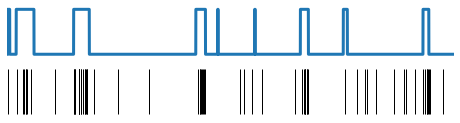

In [4]:
model.raster_plot(trialNum=14)

In [6]:
spikeCounts = model.spike_count(binsize=0.25)

In [7]:
spikeCounts.shape

(100, 12)

In [8]:
FR, FF = model.thStats(binsize=0.25)
print(FR, FF)

19.87951807228916 6.1482601921961395


In [9]:
FR, FF = model.empStats()
print(FR.mean(), FF.mean())

22.150000000000002 6.17344141032748


## Effect of number of trials

In [14]:
Ntrials_arr = np.arange(10,1000,20)
Nrun = 10 # run Nrun times to see how centered and how spread the data is  
FF_array = np.zeros((Nrun,len(Ntrials_arr)))
sample_mean_array = np.zeros(len(Ntrials_arr)) # mean of the Nrun samples
sample_std_array = np.zeros(len(Ntrials_arr)) # std of the Nrun samples

FR_array = np.zeros((Nrun,len(Ntrials_arr)))
sample_mean_FR_array = np.zeros(len(Ntrials_arr)) # mean of the Nrun samples
sample_std_FR_array = np.zeros(len(Ntrials_arr)) # std of the Nrun samples

In [15]:
for j in range(Nrun):  
    print(j)
    for i,Ntrials in enumerate(Ntrials_arr):
        model = DoublyStocPois(rH=100, rL=5, tauH=0.065, tauL=0.35, duration=3)
        telegraphs, timings = model.run(refractoriness=False, ntrials=Ntrials)
        spikeCounts = model.spike_count(binsize=0.25)
        FR, FF = model.empStats()
        FF_array[j,i] = FF.mean()
        FR_array[j,i] = FR.mean()

FR_th, FF_th = model.thStats(binsize=0.25)

0
1
2
3
4
5
6
7
8
9


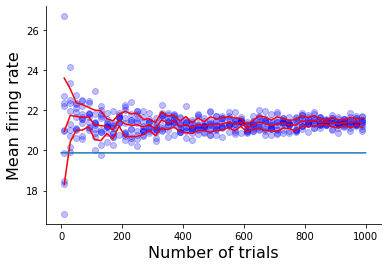

In [18]:
for i in range(Nrun):      
    plt.plot(Ntrials_arr,FR_array[i,:],'bo',alpha=0.25)  
    
sample_mean_FR_array = np.mean(FR_array,axis=0)
sample_std_FR_array = np.std(FR_array,axis=0)
plt.plot(Ntrials_arr,sample_mean_FR_array,'r-')
plt.plot(Ntrials_arr,sample_mean_FR_array-sample_std_FR_array,'r-')
plt.plot(Ntrials_arr,sample_mean_FR_array+sample_std_FR_array,'r-')
plt.xlabel("Number of trials",fontsize = 16)
plt.ylabel("Mean firing rate",fontsize = 16)

plt.plot(np.linspace(0,1000,10000),FR_th*np.ones(10000))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

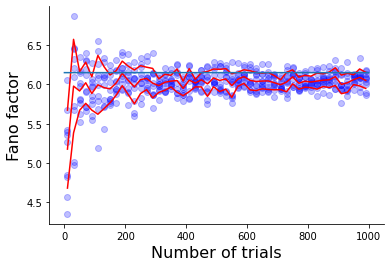

In [19]:
for i in range(Nrun):      
    plt.plot(Ntrials_arr,FF_array[i,:],'bo',alpha=0.25)  
    
sample_mean_array = np.mean(FF_array,axis=0)
sample_std_array = np.std(FF_array,axis=0)
plt.plot(Ntrials_arr,sample_mean_array,'r-')
plt.plot(Ntrials_arr,sample_mean_array-sample_std_array,'r-')
plt.plot(Ntrials_arr,sample_mean_array+sample_std_array,'r-')
plt.xlabel("Number of trials",fontsize = 16)
plt.ylabel("Fano factor",fontsize = 16)

plt.plot(np.linspace(0,1000,10000),FF_th*np.ones(10000))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()